In [1]:
file_names = ['pdf (1).pdf', 'pdf (2).pdf']

In [2]:
def extract_pdf(dir_pdf = 'C:/Users/oskar/OneDrive/thesis/data/cbm/lux_pdfs/'+file_names[0]):
    import PyPDF2

    
    pdfFileObj = open(dir_pdf, 'rb') 
    # creating a pdf reader object 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    f = []
    n = pdfReader.getNumPages()
    print('Document has '+str(n)+' pages')
    for i in range(0,n):
        pageObj = pdfReader.getPage(i)
        text = pageObj.extractText() 
        f.append(text)
    pdfFileObj.close() 
    # returns list of which contains strings from pages
    return f 


f = extract_pdf()

print('Pages type ', type(f))


Document has 48 pages
Pages type  <class 'list'>


In [7]:
import textract

text = textract.process("C:/Users/oskar/OneDrive/thesis/data/cbm/lux_pdfs/pdf (1).pdf")
#text = textract.process("C:\Users\oskar\OneDrive\thesis\data\cbm\lux_pdfs\pdf (1).pdf")

ShellError: The command `pdftotext C:/Users/oskar/OneDrive/thesis/data/cbm/lux_pdfs/pdf (1).pdf -` failed with exit code 127
------------- stdout -------------
------------- stderr -------------


In [22]:
# from CBM project PDF, populating a list of countries with corresponding values
import re

def cbm_country_page(f, page_num):
    per_page = []
    d = {}
    
    d = {label:[] for label in countries}
    page = f[page_num]
    country_name = re.search('(\n[0-9]+.\n \n)([A-Za-z]+)', page).group(2)
    for country in countries:
        r = re.finditer(country+'\n \n'+r'[0-9]+', page)
        for e in r:
            output = e.group()
            #print(output)
            o = re.finditer('[0-9]+', output)
            for el in o:
                number = el.group()
                d[country].append(number)
    for key in d:
        if len(d[key])>2:
            d[key]=d[key][0:2]
    # delete useless keys
    del d['CBM'], d['Norwegian'], d['AC'], d['MC'], d['Net']
    return country_name, d

for page in range(76,85):
    country_name, d = cbm_country_page(f, page)
    print('\n', country_name, d)


 Austria {'Norway': [], 'Austria': [], 'Belgium': ['7', '2'], 'Bulgaria': [], 'Croatia': ['1', '1'], 'Cyprus': ['8', '5'], 'Czech': [], 'Republic': ['7', '1'], 'Denmark': ['1', '1'], 'Estonia': [], 'Finland': ['1', '3'], 'France': ['1', '5'], 'Germany': ['37', '89'], 'Greece': [], 'Hungary': ['5', '1'], 'Ireland': [], 'Italy': ['5', '16'], 'Latvia': [], 'Lithuania': ['1', '1'], 'Luxembourg': ['6', '8'], 'Malta': ['3', '3'], 'Netherlands': ['11', '18'], 'Poland': ['2', '2'], 'Portugal': [], 'Romania': [], 'Slovakia': ['3', '3'], 'Slovenia': ['1', '1'], 'Spain': ['5', '5'], 'Sweden': ['1', '1'], 'UK': ['26', '5'], 'Iceland': [], 'Liechtenstein': ['1', '2'], 'Total': ['123', '169']}

 Belgium {'Norway': ['1', '1'], 'Austria': ['2', '7'], 'Belgium': [], 'Bulgaria': [], 'Croatia': [], 'Cyprus': [], 'Czech': [], 'Republic': [], 'Denmark': [], 'Estonia': [], 'Finland': ['1', '3'], 'France': ['12', '9'], 'Germany': ['2', '12'], 'Greece': [], 'Hungary': [], 'Ireland': [], 'Italy': ['2', '1'], 

In [19]:
def visualize_kg(G):
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    # TODO: add edge labels
    %matplotlib nbagg
    import matplotlib.pyplot as plt

    import networkx as nx
    
    def remove_duplicates(x):
        return list(dict.fromkeys(x))

    edges = remove_duplicates(list(G.edges()))
    nodes = list(G.nodes())
    
    pos=nx.spring_layout(G) # positions for all nodes

    # some math labels
    labels={}
    for node in nodes:
        labels[node] = str(node)
    
    colors=range(0,len(G.edges()))
    nx.draw_networkx_labels(G,pos,labels,font_size=10)
    nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=plt.cm.Blues, with_labels=False)

    plt.axis('off')
    plt.savefig("labels_and_colors.png") # save as png
    plt.show() # display

40


<IPython.core.display.Javascript object>


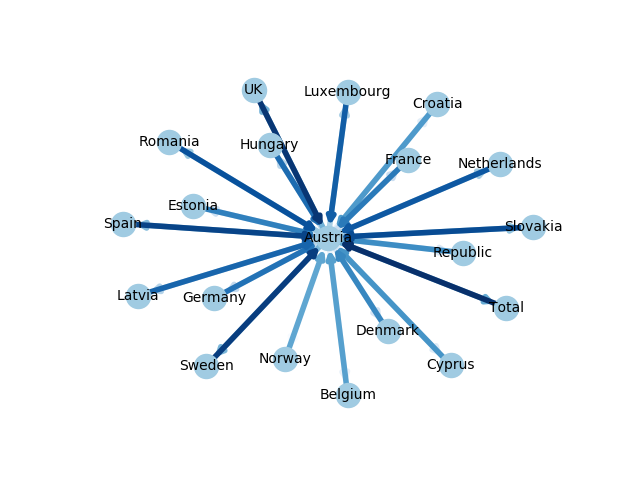

In [24]:
def dict_to_graph(G,d, prime='Austria'):
    G.add_node(prime)
    for key in d:
        if len(d[key])>1:
            G.add_node(key)
            G.add_edge(key, prime, data = d[key][0]) # check if direction is correct
            G.add_edge(prime, key, data = d[key][1])
    return G

import networkx as nx

G= nx.MultiDiGraph()
G = dict_to_graph(G,d, prime='Austria')
print(len(G.edges()))
visualize_kg(G)

<IPython.core.display.Javascript object>


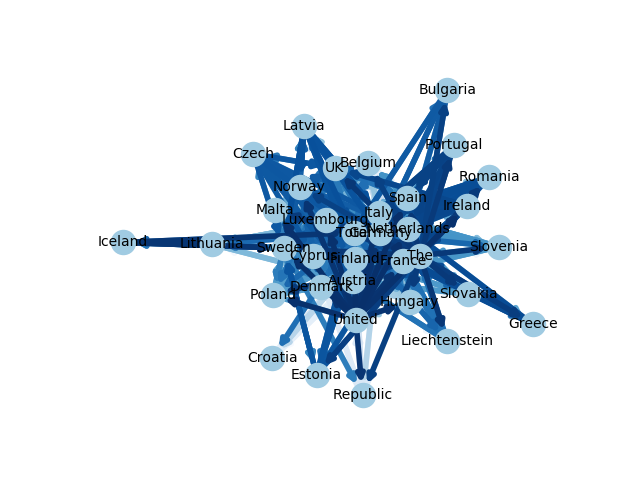

In [27]:
G= nx.MultiDiGraph()


for page in range(76,107): 
    [country_name, d] = cbm_country_page(f, page)
    G = dict_to_graph(G, d, prime=country_name)
visualize_kg(G)

In [21]:
G.edges()

OutMultiEdgeDataView([('Austria', 'Norway'), ('Austria', 'Austria'), ('Austria', 'Austria'), ('Austria', 'Belgium'), ('Austria', 'Croatia'), ('Austria', 'Cyprus'), ('Austria', 'Republic'), ('Austria', 'Denmark'), ('Austria', 'Estonia'), ('Austria', 'France'), ('Austria', 'Germany'), ('Austria', 'Hungary'), ('Austria', 'Latvia'), ('Austria', 'Luxembourg'), ('Austria', 'Netherlands'), ('Austria', 'Romania'), ('Austria', 'Slovakia'), ('Austria', 'Spain'), ('Austria', 'Sweden'), ('Austria', 'UK'), ('Austria', 'Total'), ('Norway', 'Austria'), ('Belgium', 'Austria'), ('Croatia', 'Austria'), ('Cyprus', 'Austria'), ('Republic', 'Austria'), ('Denmark', 'Austria'), ('Estonia', 'Austria'), ('France', 'Austria'), ('Germany', 'Austria'), ('Hungary', 'Austria'), ('Latvia', 'Austria'), ('Luxembourg', 'Austria'), ('Netherlands', 'Austria'), ('Romania', 'Austria'), ('Slovakia', 'Austria'), ('Spain', 'Austria'), ('Sweden', 'Austria'), ('UK', 'Austria'), ('Total', 'Austria')])